In [ ]:
#测试摇杆接收
import pygame
import pygame
import win32api
# 初始化Pygame
pygame.init()

# 获取摇杆控制器
joystick = pygame.joystick.Joystick(0)
joystick.init()

# 创建日志文件
#log_file = open("./yaoganshuju/joystick_log.txt", "w")
flag=True
while flag:
    
    for event in pygame.event.get():
            if event.type == pygame.JOYAXISMOTION:
                if event.axis ==0:
                    axis = event.axis
                    value = event.value
                    
                    if round(value,3)-round(last,3)>0.002 or round(last,3)-round(value,3)>0.002:
                        #log_file.write("Axis {:}: {:.3f}\n".format(axis,value))
                        print("Axis {:}: {:.3f}\n".format(axis,value))
                    last = event.value

            '''elif event.type == pygame.JOYBUTTONDOWN:
                button = event.button
                log_file.write(f"Button {button} down\n")
            elif event.type == pygame.JOYBUTTONUP:
                button = event.button
                log_file.write(f"Button {button} up\n")'''

            # 如果按下摇杆的13号按钮（SELECT），退出程序
            if event.type == pygame.JOYBUTTONDOWN and event.button == 13:
                flag=False
                #log_file.close()
                #pygame.quit()      #这个是导致会话崩溃的根本原因
                break

In [ ]:
#录制，截图并获取摇杆信息
import numpy as np
import pyautogui
import cv2
import pygetwindow as gw
import pygame
import win32api
# 初始化Pygame
pygame.init()

# 获取摇杆控制器
joystick = pygame.joystick.Joystick(1)
joystick.init()

# 创建日志文件
log_file = open("./yaoganshuju/joystick_log.txt", "w")

# 监听摇杆事件
flag = True
i=0
REC=False
while flag:
    ind = 0
    if win32api.GetAsyncKeyState(0x30):#按0激活
        if REC==False and ind==0:
            REC=True
            ind=1
        if REC==True and ind==0:
            REC=False
            ind=1
    print(REC)
    if REC==True:    
        # 获取屏幕截图
        target_window = gw.getWindowsWithTitle('American Truck Simulator')[0]  # Replace '目标窗口标题' with the actual title of the window
    
        window_rect = (target_window.left, target_window.top, target_window.width, target_window.height)
    
        screenshot = pyautogui.screenshot()
        screenshot = screenshot.crop((window_rect[0]+11, window_rect[1]+39, window_rect[0] + window_rect[2]-11, window_rect[1] + window_rect[3]-11))
    
        # 将截图转换成OpenCV图像
        frame = cv2.cvtColor(np.array(screenshot), cv2.COLOR_RGB2BGR)
        resize = cv2.resize(frame, (320,180))#[:270,:480]
        # 显示图像
        cv2.imshow('Screen Capture', resize)
    

        # 检测按键事件，按下q键退出循环
        if cv2.waitKey(1) == ord('q'):
            break
      
    
    #接收摇杆信息
        for event in pygame.event.get():
            if event.type == pygame.JOYAXISMOTION:
                if event.axis ==0:
                    axis = event.axis
                    value = event.value
                    log_file.write("Axis {:}: {:.3f}\n".format(axis,value))
                    cv2.imwrite(f'./capture/capture_{i}.png',resize)
            '''elif event.type == pygame.JOYBUTTONDOWN:
                button = event.button
                log_file.write(f"Button {button} down\n")
            elif event.type == pygame.JOYBUTTONUP:
                button = event.button
                log_file.write(f"Button {button} up\n")'''

            # 如果按下摇杆的6号按钮（SELECT），退出程序
            if event.type == pygame.JOYBUTTONDOWN and event.button == 6:
                flag=False
                log_file.close()
                #pygame.quit()      #这个是导致会话崩溃的根本原因
                break
                #exit()
            i+=1       
    #i+=1
# 清理资源
cv2.destroyAllWindows()

[-0.256 -0.231 -0.206 -0.181 -0.156 -0.131 -0.106 -0.081 -0.056 -0.031
 -0.006  0.019  0.044  0.069  0.094  0.119  0.144  0.169  0.194  0.219
  0.244]
220


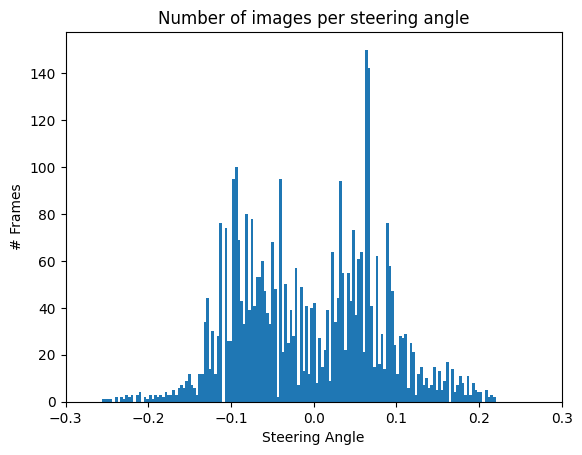

In [12]:
#数据直方图
import matplotlib.pyplot as plt
y = []
with open('./yaoganshuju/joystick_log.txt','r') as file:
    lines = file.readlines()
    for line in lines:
        y.append(float(line.strip().split(':')[1]))
binwidth = 0.025
dt = []
for i in y:
    dt.append(float(i))

print(np.arange(min(dt), max(dt) + binwidth, binwidth))
print(len(set(dt)))
#直方图
plt.hist(dt,bins=151)
plt.xlim(-0.3,0.3)
plt.title('Number of images per steering angle')
plt.xlabel('Steering Angle')
plt.ylabel('# Frames')
plt.show()

In [ ]:
#键盘监听（学习）
from pynput import keyboard, mouse

def on_keyboard_press(key):
    print(f'键盘按下：{str(key)}')

def on_mouse_move(x, y):
    print(f'鼠标移动至：({x}, {y})')

def on_mouse_click(x, y, button, pressed):
    if pressed:
        print(f'鼠标按下：({x}, {y}) - {button}')
    else:
        print(f'鼠标松开：({x}, {y}) - {button}')
    
# 创建键盘监听器
keyboard_listener = keyboard.Listener(on_press=on_keyboard_press)

# 创建鼠标监听器
mouse_listener = mouse.Listener(on_move=on_mouse_move, on_click=on_mouse_click)

# 启动监听器
keyboard_listener.start()
mouse_listener.start()

# 进入监听状态，直到按下Escape键退出程序
keyboard_listener.join()

In [8]:
#摇杆监听（学习）
import pygame
import cv2

# 初始化Pygame
pygame.init()

# 获取摇杆控制器
joystick = pygame.joystick.Joystick(0)
joystick.init()

# 创建日志文件
log_file = open("joystick_log.txt", "w")

# 监听摇杆事件
flag=True
while flag:

    for event in pygame.event.get():
        if event.type == pygame.JOYAXISMOTION:
            if event.axis ==0:
                axis = event.axis
                value = event.value
                log_file.write("Axis {:}: {:.3f}\n".format(axis,value))
        if event.type == pygame.JOYBUTTONDOWN:
            button = event.button
            log_file.write(f"Button {button} down\n")
        if event.type == pygame.JOYBUTTONUP:
            button = event.button
            log_file.write(f"Button {button} up\n")

        # 如果按下摇杆的0号按钮（示例），退出程序
        if event.type == pygame.JOYBUTTONDOWN and button == 0:
            flag=False
            log_file.close()
            #pygame.quit()      #这个是导致会话崩溃的根本原因
            break
            #exit()
    

    


In [2]:
#数据增强处理

from keras.preprocessing.image import random_channel_shift

def horizontal_flip(img, steering_angle):
    flipped_image = cv2.flip(img, 1)
    steering_angle = -1 * steering_angle
    return flipped_image, steering_angle

def channel_shift(img, channel_shift_range=0.02):
    img_channel_index = 2 # tf indexing
    channel_shifted_image = random_channel_shift(img, channel_shift_range, img_channel_index)
    return channel_shifted_image

# shift height/width of the image by a small fraction
def height_width_shift(img, steering_angle):
    rows, cols, channels = img.shape
    
    # Translation
    tx = 100 * np.random.uniform() - 100 / 2
    ty = 40 * np.random.uniform() - 40 / 2
    steering_angle = steering_angle + tx / 100 * 2 * .2
    
    transform_matrix = np.float32([[1, 0, tx],
                                   [0, 1, ty]])
    
    translated_image = cv2.warpAffine(img, transform_matrix, (cols, rows))
    return translated_image, steering_angle

def brightness_shift(img, bright_value=None):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    if bright_value:
        img[:,:,2] += bright_value
    else:
        random_bright = .25 + np.random.uniform()
        img[:,:,2] = img[:,:,2] * random_bright
    
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    return img

def apply_random_transformation(img, steering_angle):
    
    transformed_image, steering_angle = height_width_shift(img, steering_angle)
    transformed_image = brightness_shift(transformed_image)
    if np.random.random() < 0.5:
        transformed_image, steering_angle = horizontal_flip(transformed_image, steering_angle)
    
    return transformed_image, steering_angle

def load_and_augment_image(OX,OY):
    NX = []
    NY = []
    for x,y in zip(OX,OY):
        nx, ny = apply_random_transformation(x, y)
        NX.append(nx)
        NY.append(ny)
    NX = np.array(NX)
    NY = np.array(NY)
    return NX, NY

In [2]:
#加载数据集
import os
import time
from PIL import Image
import cv2
import numpy as np

def read_images_by_time(folder_path):
    images = []
    file_times = {}

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(folder_path, filename)
            file_times[file_path] = os.path.getmtime(file_path)

    sorted_files = sorted(file_times.items(), key=lambda x: x[1])

    for file_path, _ in sorted_files:
        image = Image.open(file_path)
        image_array = np.array(image)
        image_array = image_array[80:,:]#割掉天空
        image_array = cv2.resize(image_array,(256,256))
        images.append(image_array)
    images_array = np.array(images)
    return images_array

folder_path = "./NEcapture/"

images_array=read_images_by_time(folder_path)

print(images_array.shape)

splitrate = 0.80
X = images_array

y = []
with open('./yaoganshuju/Nomal+enhancejoystick_log.txt','r') as file:
    lines = file.readlines()
    for line in lines:
        y.append(float(line.strip().split(':')[1]))
Y = np.array(y)

#X, Y = load_and_augment_image(X, Y) #是否增强

print(X.shape,Y.shape)

(5391, 256, 256, 3)
(5391, 256, 256, 3) (5391,)


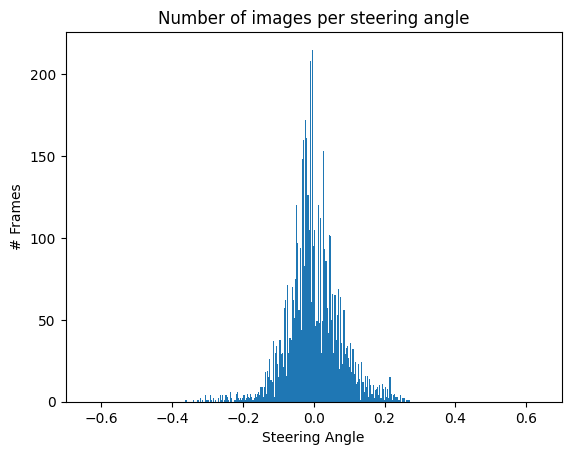

In [3]:
#数据集直方图
import matplotlib.pyplot as plt

plt.hist(Y,bins=200)
plt.xlim(-0.7,0.7)
plt.title('Number of images per steering angle')
plt.xlabel('Steering Angle')
plt.ylabel('# Frames')
plt.show()

In [4]:
#查看某张图像及其标签
change = cv2.cvtColor(X[0],cv2.COLOR_BGR2RGB)
cv2.imshow('pic1',change)
print(Y[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

0.075


In [5]:
#模型定义
from keras.models import Sequential
from keras.layers import *
import tensorflow
from keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(monitor='val_loss', patience=20)

model = Sequential()
#model.add(BatchNormalization(input_shape=(128,128,3)))
model.add(Conv2D(32,(5,5),padding='Same',activation='relu',strides=2,input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3),padding='Same',activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,(3,3),padding='Same',activation='relu',strides=2))
model.add(Conv2D(128,(3,3),padding='Same',activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256,(3,3),padding='Same',activation='relu',strides=1))
model.add(Conv2D(256,(3,3),padding='Same',activation='relu',strides=1))
#model.add(Conv2D(256,(3,3),padding='Same',activation='relu',strides=1))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.25))
#model.add(Conv2D(128,(3,3),padding='Same',activation='relu',strides=1))
#model.add(Conv2D(64,(3,3),padding='Same',activation='relu',strides=1))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(2048,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(2048,activation='relu'))

#model.add(Dropout(0.4))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))
model.add(Dense(1,activation='linear'))

# model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(),metrics=['accuracy'])
model.compile(loss=tensorflow.keras.losses.mse, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['mse'])
#model.summary()


In [6]:
#基础模型训练
#model.fit(x_train,y_train,batch_size=32,validation_data=(x_test, y_test), callbacks=[early_stopping],verbose=2, epochs=100)

model.fit(X,Y,batch_size=100,verbose=1, epochs=200)

Epoch 1/200
54/54 [==============================] - 8s 67ms/step - loss: 0.4845 - mse: 0.4845
Epoch 2/200
54/54 [==============================] - 3s 58ms/step - loss: 0.0078 - mse: 0.0078
Epoch 3/200
54/54 [==============================] - 3s 58ms/step - loss: 0.0054 - mse: 0.0054
Epoch 4/200
54/54 [==============================] - 3s 58ms/step - loss: 0.0046 - mse: 0.0046
Epoch 5/200
54/54 [==============================] - 3s 57ms/step - loss: 0.0038 - mse: 0.0038
Epoch 6/200
54/54 [==============================] - 3s 57ms/step - loss: 0.0037 - mse: 0.0037
Epoch 7/200
54/54 [==============================] - 3s 57ms/step - loss: 0.0055 - mse: 0.0055
Epoch 8/200
54/54 [==============================] - 3s 58ms/step - loss: 0.0050 - mse: 0.0050
Epoch 9/200
54/54 [==============================] - 3s 58ms/step - loss: 0.0042 - mse: 0.0042
Epoch 10/200
54/54 [==============================] - 3s 58ms/step - loss: 0.0037 - mse: 0.0037
Epoch 11/200
54/54 [=============================

In [19]:
#扩展训练数据集
XTR=X;YTR=Y
RATE=0.8
x_train,y_train,x_test, y_test = XTR[:int(XTR.shape[0]*RATE)],YTR[:int(XTR.shape[0]*RATE)],XTR[int(XTR.shape[0]*RATE):],YTR[int(XTR.shape[0]*RATE):]

In [33]:
#扩展训练
import tensorflow
from keras.models import load_model
model = load_model('./1745_steering_model.h5')
#model.summary()
for layer in model.layers[:10]:  # n是卷积层数量，前n层为卷积层
    print(layer)
    layer.trainable = False
    
model.compile(loss=tensorflow.keras.losses.mse, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['mse'])
model.fit(x_train,y_train,batch_size=128,verbose=1, epochs=100,validation_data=(x_test, y_test))

Epoch 1/100
22/22 [==============================] - 2s 47ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 2/100
22/22 [==============================] - 1s 33ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0506 - val_mse: 0.0506
Epoch 3/100
22/22 [==============================] - 1s 33ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0480 - val_mse: 0.0480
Epoch 4/100
22/22 [==============================] - 1s 33ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 5/100
22/22 [==============================] - 1s 33ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0546 - val_mse: 0.0546
Epoch 6/100
22/22 [==============================] - 1s 33ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0508 - val_mse: 0.0508
Epoch 7/100
22/22 [==============================] - 1s 33ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 8/100
22/22 [==============================] - 1s 33ms/step - loss: 0.

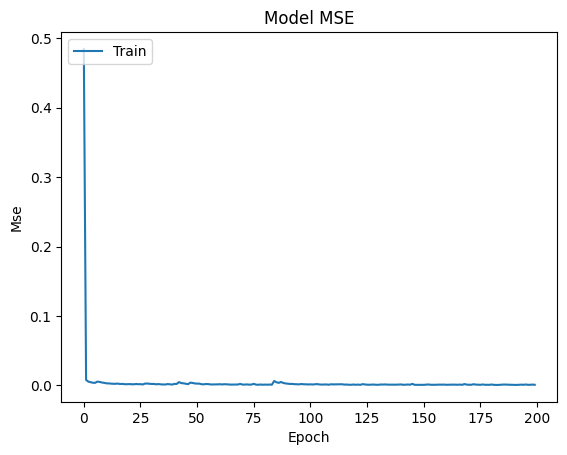

In [7]:
# 绘制训练的均方差
#plt.figure(figsize=(18,10))
plt.plot(model.history.history['mse'])
#plt.plot(model.history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('Mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [8]:
#保存模型
model.save("771637_steering_model.h5", save_format="h5")

In [19]:
#指定结果预览
from keras.models import load_model
import cv2
import numpy as np
# 载入模型
model = load_model('./2058_steering_model.h5')
img = cv2.imread('./capture/capture_20340.png')
img = img[75:,:]
img = cv2.resize(img,(256,256))

img = np.expand_dims(img, axis=0)

print(img.shape)
print(model.predict(img))

yp = model.predict(X[3300:3301])
print(yp.shape)
print(np.max(yp))
#print(model.evaluate(x_test,y_test))

(1, 256, 256, 3)
1/1 [==============================] - 0s 132ms/step
[[0.02170889]]


In [ ]:
#执行函数，检测并将数据输入ATS
import numpy as np
import pyautogui
import cv2
import pygetwindow as gw
import pygame
import pyvjoy
from keras.models import load_model
import win32api
import time

global j
j = pyvjoy.VJoyDevice(1)

model = load_model('./steering_model.h5')

def set_joystick_axis(x_value, y_value):
    # 创建 vJoy 设备实例
    joystick = pyvjoy.VJoyDevice(1)  # 1 表示设备 ID，根据你的设置进行调整
    
    # 设置左摇杆的值
    joystick.set_axis(pyvjoy.HID_USAGE_X, x_value)  # 设置 X 轴的值
    joystick.set_axis(pyvjoy.HID_USAGE_Y, y_value)  # 设置 Y 轴的值
    
    joystick.update()
    # 释放 vJoy 设备
    joystick.__del__

def stop_joystick():
    # 创建 vJoy 设备实例
    joystick = pyvjoy.VJoyDevice(1)  # 1 表示设备 ID，根据你的设置进行调整
    
    # 将摇杆值设置为中心位置
    x_value = 16384  # X 轴中心位置的值
    y_value = 16384  # Y 轴中心位置的值
    
    joystick.set_axis(pyvjoy.HID_USAGE_X, x_value)  # 设置 X 轴的值
    joystick.set_axis(pyvjoy.HID_USAGE_Y, y_value)  # 设置 Y 轴的值
    
    joystick.update()
    # 释放 vJoy 设备
    joystick.__del__

#img = cv2.imread('./P1.png')
AP = False
SETL = False
SETR = False
flag=True
while flag:
    if win32api.GetAsyncKeyState(0x36):#按6激活
        print('6pressed')
        AP=True
    if win32api.GetAsyncKeyState(0x31):#按1暂停
        print('1pressed')
        SETL=SETR=False
        AP=False
    if win32api.GetAsyncKeyState(0x30):#按0结束
        print('0pressed')

        AP=False
        flag = False
    
    #进行设置
    if win32api.GetAsyncKeyState(0x37):
        print('set left')
        SETL = True
        SETR = False
    if win32api.GetAsyncKeyState(0x38):
        print('set right')
        SETR = True
        SETL = False

    if SETL==True:
        j.data.wAxisX = int(0)
        j.update()
        
    if SETR==True:
        j.data.wAxisX = int(1*32767)
        j.update()
        
    
    if AP==True:
        target_window = gw.getWindowsWithTitle('American Truck Simulator')[0]  # Replace '目标窗口标题' with the actual title of the window
        #target_window = gw.getWindowsWithTitle('大作业')[0]  # Replace '目标窗口标题' with the actual title of the window
        window_rect = (target_window.left, target_window.top, target_window.width, target_window.height)
    
        screenshot = pyautogui.screenshot()
        screenshot = screenshot.crop((window_rect[0]+11, window_rect[1]+39, window_rect[0] + window_rect[2]-11, window_rect[1] + window_rect[3]-11))
    
        # 将截图转换成OpenCV图像
        frame = cv2.cvtColor(np.array(screenshot), cv2.COLOR_RGB2BGR)
        img = cv2.resize(frame,(320,180))
        img = cv2.resize(img[72:,:],(256,256))

        FD_img = np.expand_dims(img, axis=0)

        #print(FD_img.shape)
        # 显示图像
        cv2.imshow('Screen Capture', img)
        steering_value=model.predict(FD_img)[0][0]
        print(int(steering_value*16384 +16384),steering_value)
        # 设置虚拟手柄的输入
        #set_joystick_axis(int(steering_value*32767), 0)
        j.data.wAxisX = int(steering_value * 16384 +16384)
        #j.data.wAxisY = int(0.5*32767)
        j.update()

    if AP==False and SETL==False and SETR==False:
        j.data.wAxisX = int(0.5*32767)
        j.data.wAxisY = int(0.5*32767)
        j.update()
    if cv2.waitKey(1) == ord('q'):
        flag = False
        break

cv2.destroyAllWindows()


In [34]:
#VGG16尝试，数据集加载
import os
import time
from PIL import Image
import cv2
import numpy as np

def read_images_by_time(folder_path):
    images = []
    file_times = {}

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_path = os.path.join(folder_path, filename)
            file_times[file_path] = os.path.getmtime(file_path)

    sorted_files = sorted(file_times.items(), key=lambda x: x[1])

    for file_path, _ in sorted_files:
        image = Image.open(file_path)
        image_array = np.array(image)
        image_array = image_array[80:,:]#割掉天空
        image_array = cv2.resize(image_array,(256,256))
        images.append(image_array)
    images_array = np.array(images)
    return images_array

folder_path = "./capture/"

images_array=read_images_by_time(folder_path)

print(images_array.shape)

splitrate = 0.80
XTR = images_array

y = []
with open('./yaoganshuju/joystick_log.txt','r') as file:
    lines = file.readlines()
    for line in lines:
        y.append(float(line.strip().split(':')[1]))
YTR = np.array(y)
YTR = YTR.reshape((YTR.shape[0],1))
#X, Y = load_and_augment_image(X, Y) #是否增强

print(XTR.shape,YTR.shape)

(3086, 256, 256, 3)
(3086, 256, 256, 3) (3086, 1)


In [ ]:
# vgg16D 尝试
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#数据准备
#(x_train,y_train), (x_test, y_test)=tf.keras.datasets.cifar100.load_data() 
RATE=0.8
x_train,y_train,x_test, y_test = XTR[:int(XTR.shape[0]*RATE)],YTR[:int(XTR.shape[0]*RATE)],XTR[int(XTR.shape[0]*RATE):],YTR[int(XTR.shape[0]*RATE):]

# 数据预处理部分 z-score标准化
mean = np.mean(x_train, axis=(0, 1, 2, 3))#四个维度 批数 像素x像素 通道数
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train - mean) / (std + 1e-7)#trick 加小数点 避免出现整数 
x_test = (x_test - mean) / (std + 1e-7) 

#转换one-hot独热映射
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

# 构建模型
def vgg16D():
    model = tf.keras.Sequential()
    # 第一块
    #conv1
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[3, 3], input_shape=(256, 256, 3), strides=1,activation='relu',padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Dropout(0.4)) 
    
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    #最大池化层1
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    # 第二块
    #conv3
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Dropout(0.4))
    #conv4
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    #最大池化层2
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))



    #conv5
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Dropout(0.4))
    #conv6
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Dropout(0.4))
    #conv7
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    #最大池化层3
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    #conv8
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Dropout(0.4))
    #conv9
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Dropout(0.4))
    #conv10
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    #最大池化层4
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


    #conv11
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Dropout(0.4))
    #conv12
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    model.add(tf.keras.layers.Dropout(0.4))
    #conv13
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=[3, 3], strides=1,activation='relu',
                                            padding='SAME', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization()) 
    #最大池化层5
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    #f-c 三层 
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(rate=0.5))

    model.add(tf.keras.layers.Dense(units=512,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0005)))
    model.add(tf.keras.layers.BatchNormalization())


    model.add(tf.keras.layers.Dense(units=100))
    model.add(tf.keras.layers.Activation('softmax'))
    #查看摘要
    model.summary()
    return model
    
#超参设置
training_epochs = 100
batch_size = 128
learning_rate = 0.01
momentum = 0.9 #SGD加速动量
lr_decay = 1e-6 #学习衰减
lr_drop = 20 #衰减倍数
model = vgg16D()

# 每20个epoch 学习率缩小为原来的一半
def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
'''# 数据增强
datagen = ImageDataGenerator(
    rotation_range=15,  # 旋转的范围
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=True,  # 随机水平翻转。
)
datagen.fit(x_train)'''
# 使用sgd优化器
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate,
                                    decay=1e-6, momentum=momentum, nesterov=True)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

history = model.fit(x_train,y_train, epochs=training_epochs, callbacks=[reduce_lr],
                    steps_per_epoch=x_train.shape[0] // batch_size, validation_data=(x_test, y_test))   
# 绘制训练 && 验证的均方差
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('Mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 && 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
